In [ ]:
import panel as pn
import altair as alt
from altair import datum
import pandas as pd
import datetime as dt
from pandas_profiling import ProfileReport
import numpy as np
import os
from os import listdir
import warnings
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
files=os.listdir("data//USData//")
HospitalData=pd.read_csv("data//covid19-Hospitals.csv")
populationData=pd.read_csv("data//PopulationUSState.csv")
populationData.columns=["state","population"]
populationData["population"]=populationData["population"].str.replace(',','').astype(float)
HospitalData["Inpatient_Bed_Capacity"]=HospitalData["Inpatient_Bed_Capacity"].astype(float)

In [80]:
df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [ ]:
frames=[]
for file in files:
    df=pd.read_csv("data//USData//"+file)
    df['date']=pd.to_datetime(df['date'])
    df=df.fillna(0)
    df=df.sort_values(by='date',ascending=True)
    frames.append(df)
    #print(df.shape)
final=pd.concat(frames)

In [ ]:
StatwiseBeds=HospitalData.groupby(["state"])["Inpatient_Bed_Capacity","ICU_Bed_total_estimate_Capacity"].mean()


In [ ]:
final=final.merge(StatwiseBeds,on='state')
final=final.merge(populationData,on='state')

In [ ]:
final

In [ ]:
final.to_csv("data//USCombined.csv")

In [73]:
states=final['state'].unique()
final['deathIncrease_per_Million']= final['deathIncrease']/final['population']*1000000
data={}
for state in states:
    df=final[final['state']==state]
    df['deathIncreaseSmooth_pm']=df['deathIncrease_per_Million'].rolling(7, min_periods=1).mean()
    plt.plot(df['date'],df['deathIncreaseSmooth_pm'],label=state)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


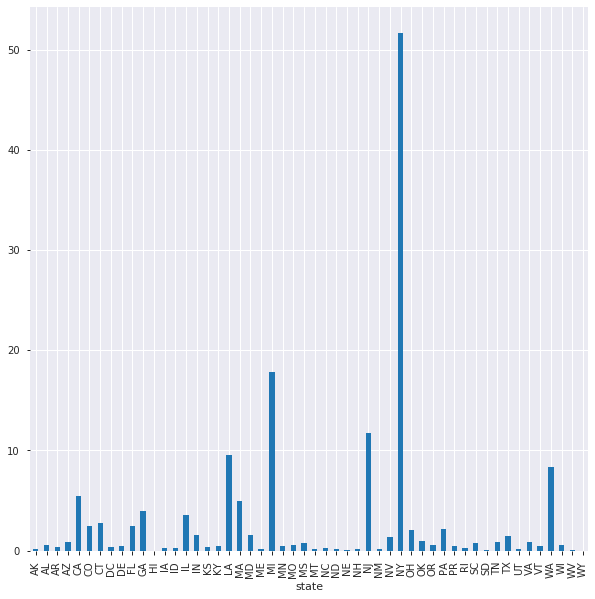

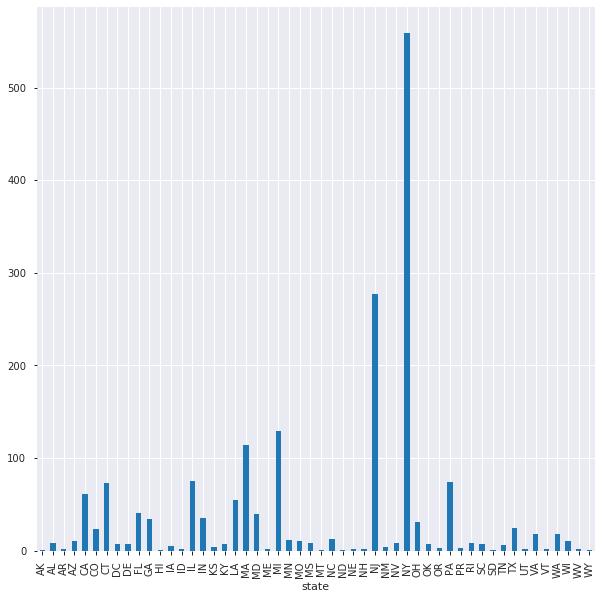

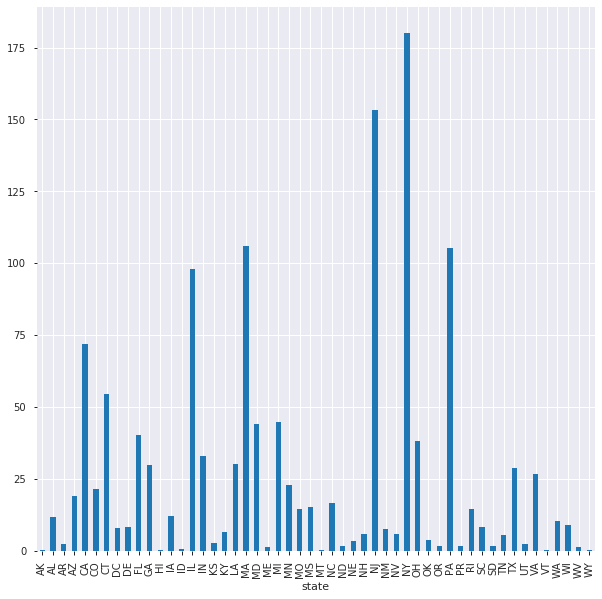

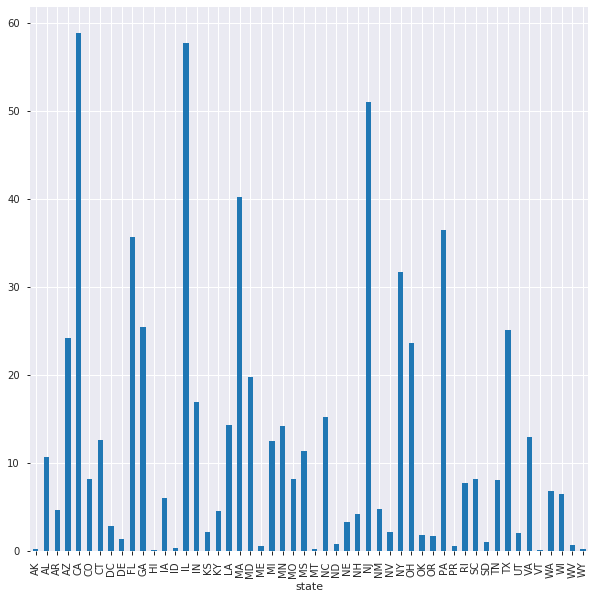

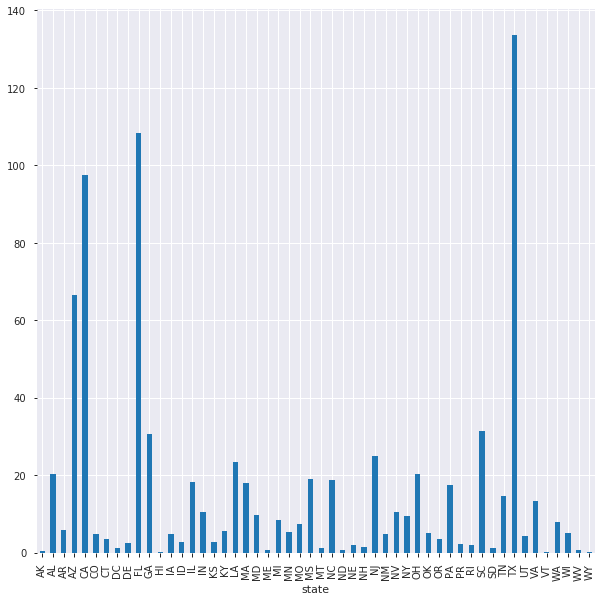

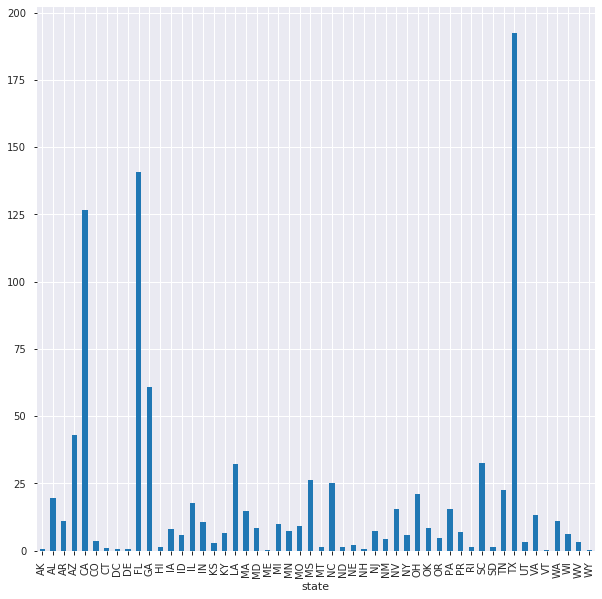

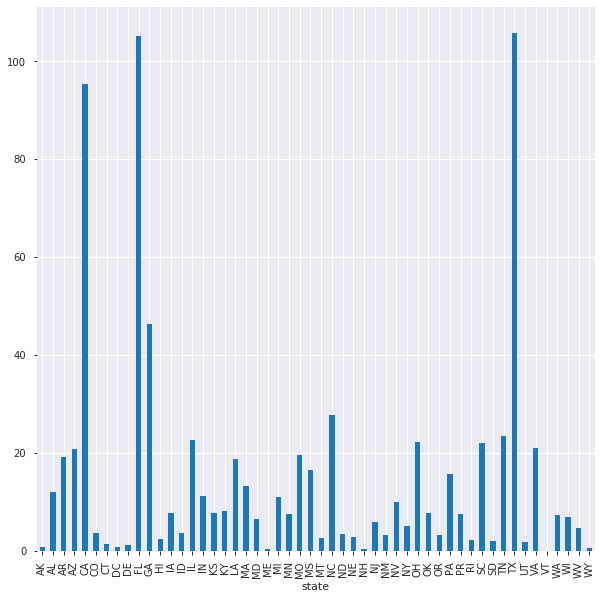

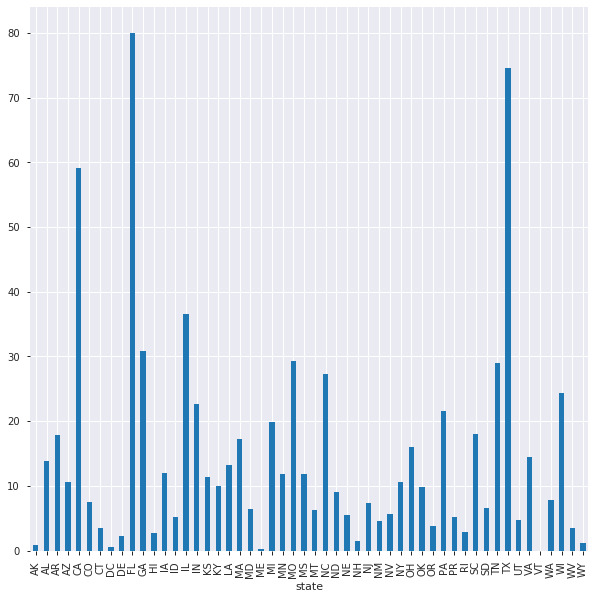

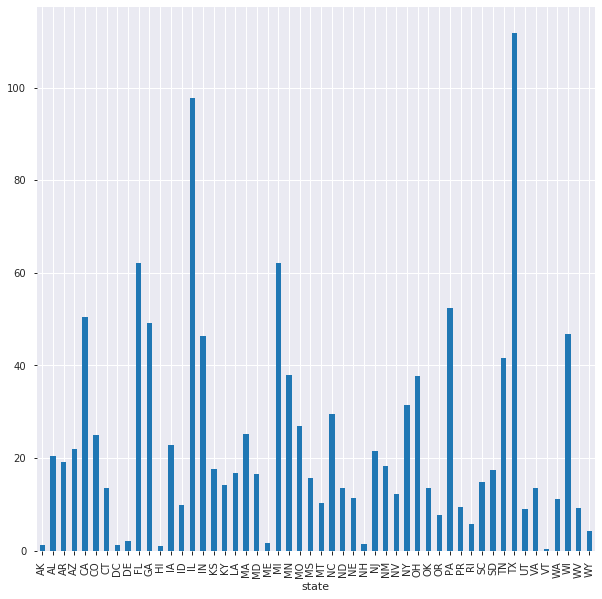

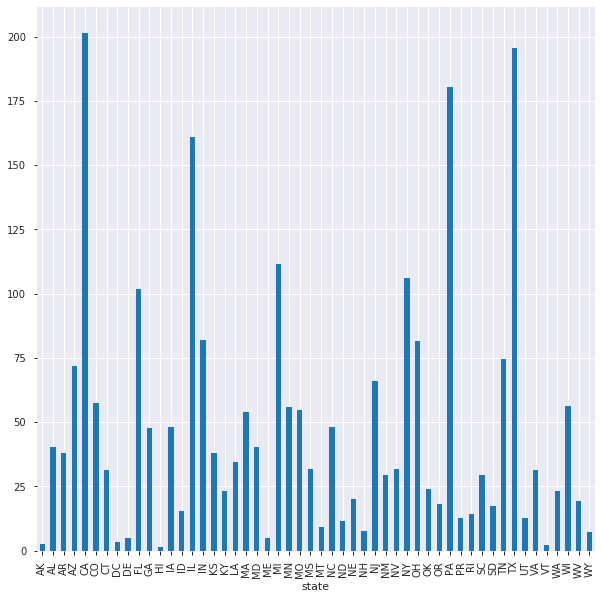

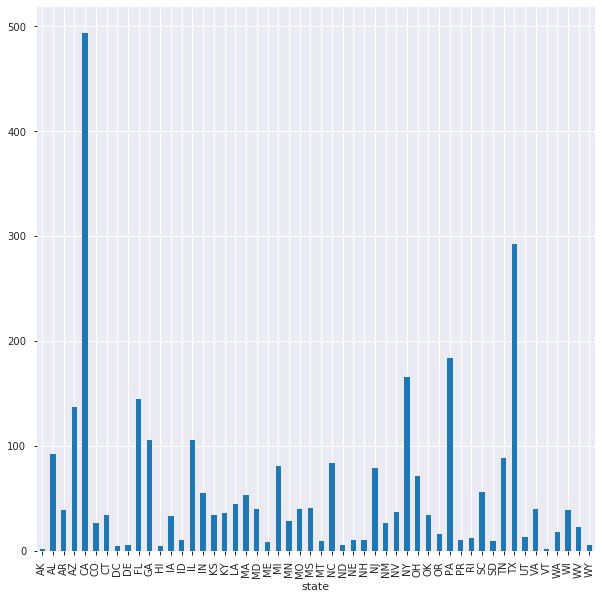

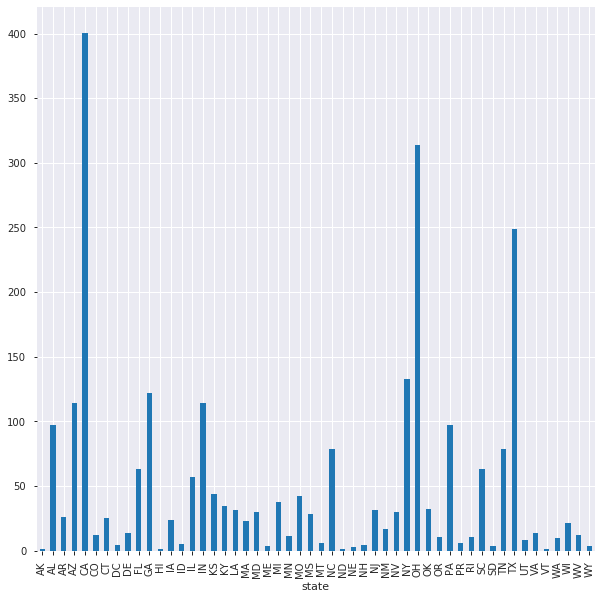

In [74]:
states=final['state'].unique()
data={}
final['month'] = pd.DatetimeIndex(final['date']).month
months=final['month'].unique()
for month in months:
    df=final[final['month']==month]
    fig, ax = plt.subplots(figsize=(10,10))
    abcd = df.groupby(['state'])['deathIncrease'].sum()
    abcd.plot.bar()
    
plt.show()

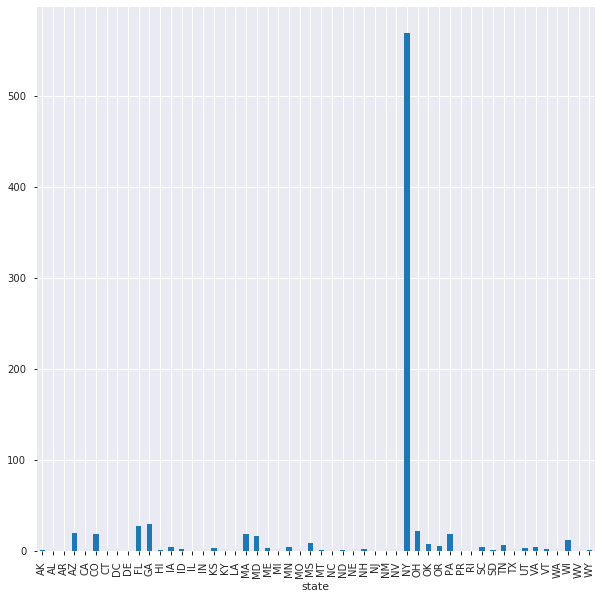

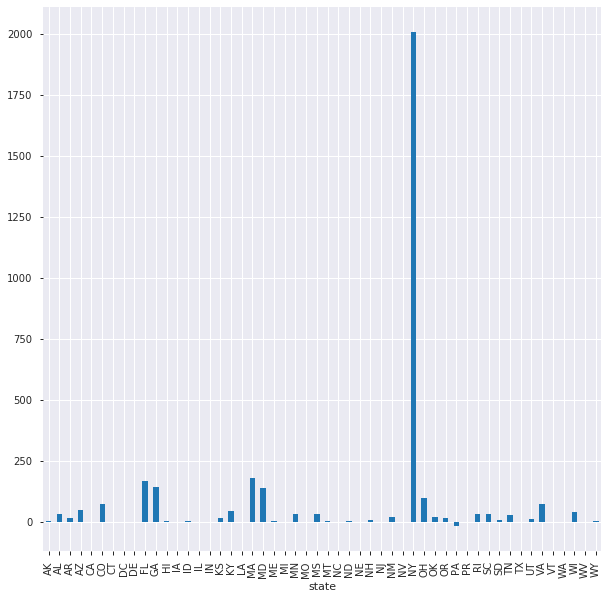

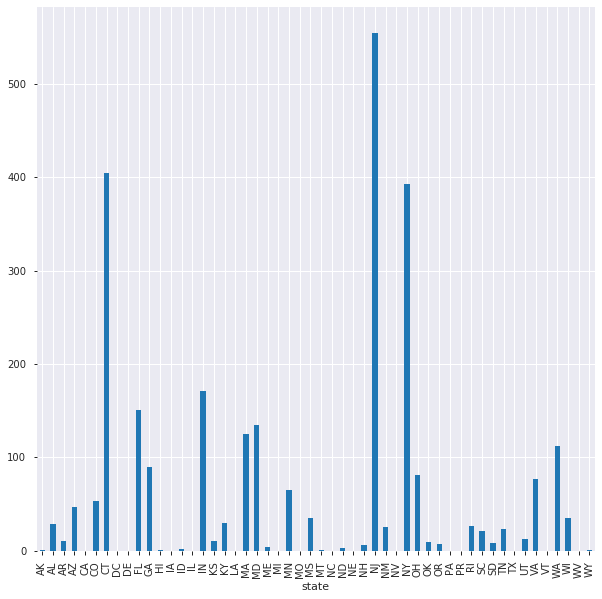

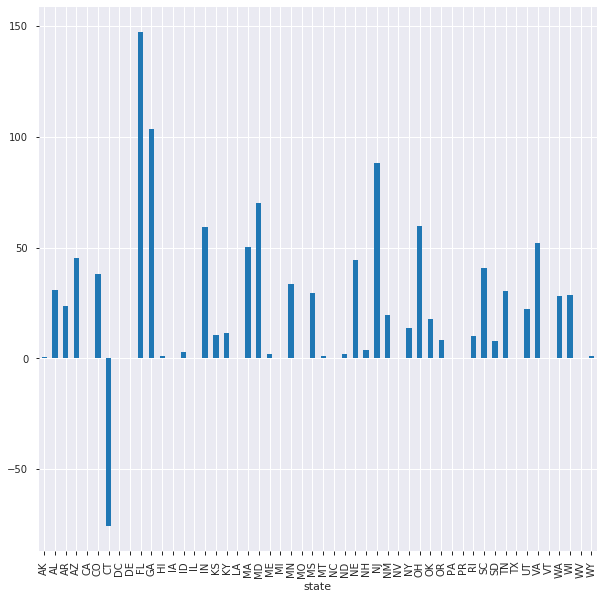

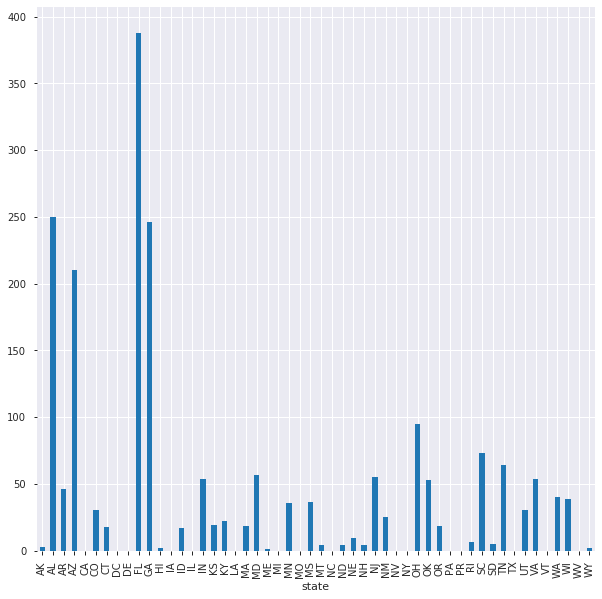

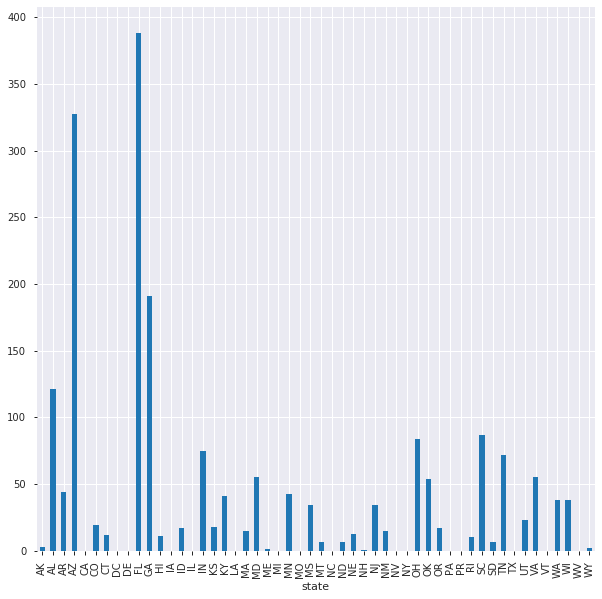

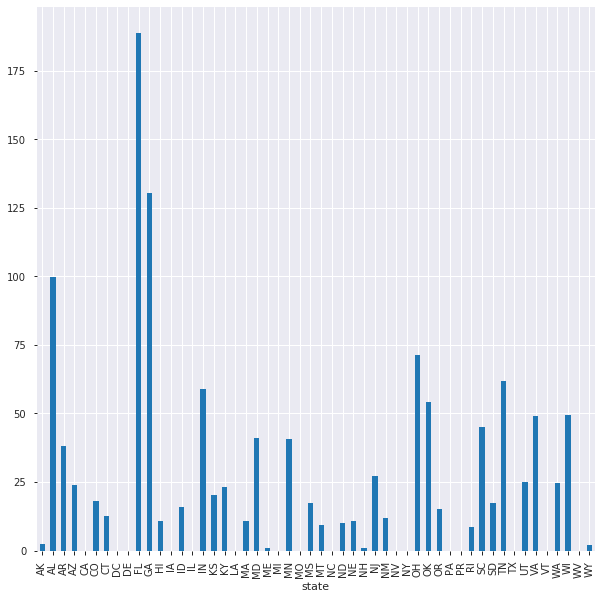

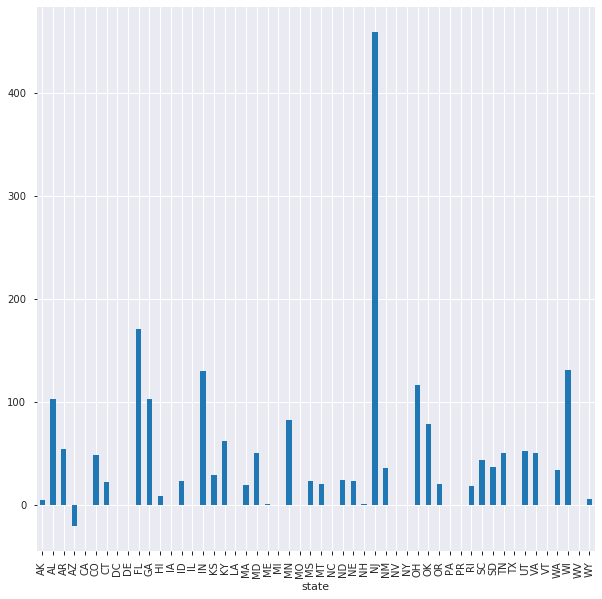

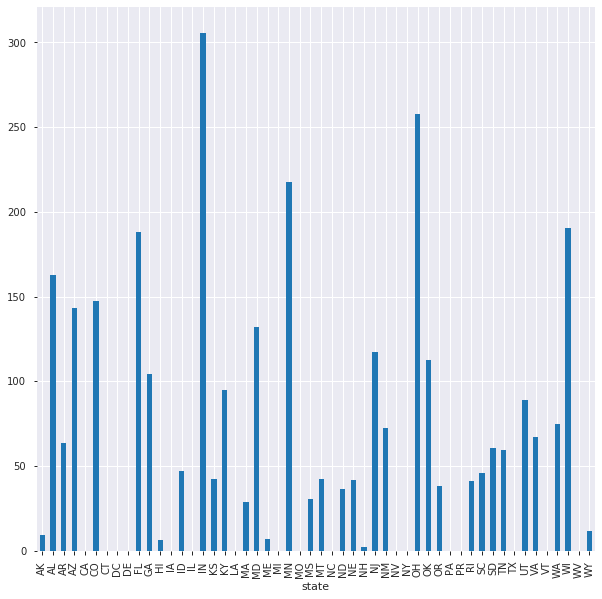

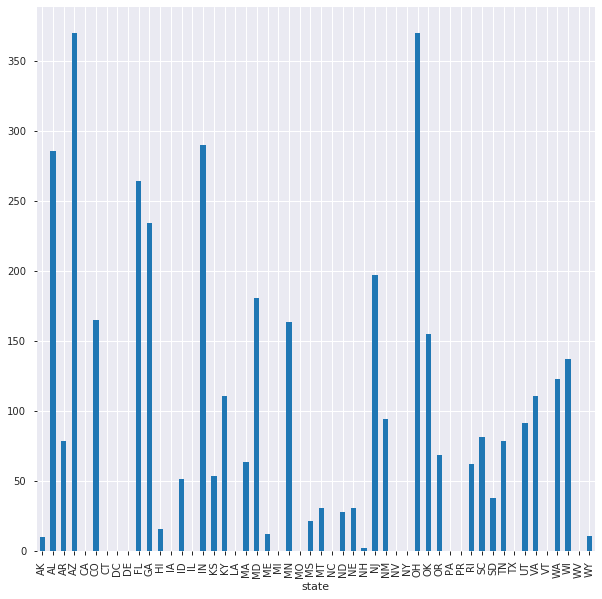

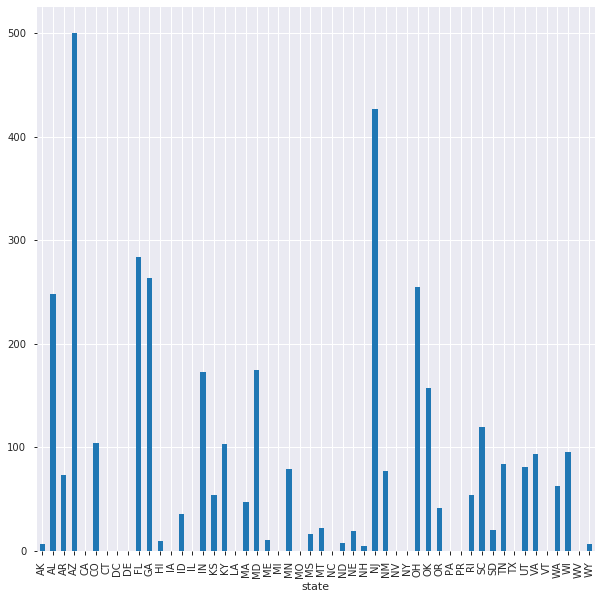

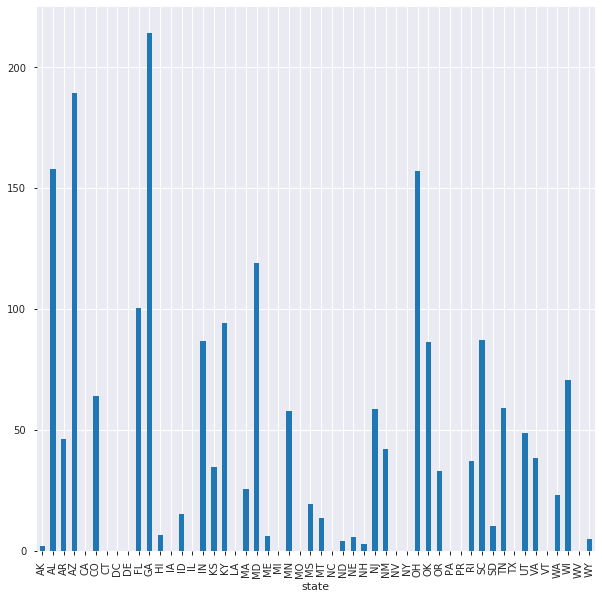

In [75]:
states=final['state'].unique()
data={}
final['month'] = pd.DatetimeIndex(final['date']).month
months=final['month'].unique()
for month in months:
    df=final[final['month']==month]
    fig, ax = plt.subplots(figsize=(10,10))
    abcd = df.groupby(['state'])['hospitalizedIncrease'].mean()
    abcd.plot.bar()
    
plt.show()

In [86]:
df.hospitalizedCurrently

17709       0.0
17710       0.0
17711       0.0
17712       0.0
17713       0.0
          ...  
18055    9998.0
18056    9636.0
18057    9299.0
18058    9075.0
18059    8855.0
Name: hospitalizedCurrently, Length: 351, dtype: float64

In [30]:
populationData

,States,Population
0,Alabama,"4,903,185"
1,Alaska,"731,545"
2,Arizona,"7,278,717"
3,Arkansas,"3,017,804"
4,California,"39,512,223"
5,Colorado,"5,758,736"
6,Connecticut,"3,565,287"
7,Delaware,"973,764"
8,District of Columbia,"705,749"
9,Florida,"21,477,737"


In [32]:
final.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [34]:
final.state.unique()

array(['NC', 'VA', 'NE', 'NY', 'IA', 'CO', 'MD', 'FL', 'PA', 'OK', 'MP',
       'PR', 'TX', 'WI', 'MN', 'ND', 'WY', 'NV', 'MO', 'CT', 'SD', 'ME',
       'KY', 'AK', 'OR', 'DE', 'KS', 'GA', 'MT', 'GU', 'UT', 'AZ', 'NM',
       'LA', 'AL', 'MS', 'NJ', 'SC', 'MA', 'MI', 'DC', 'ID', 'WV', 'AS',
       'RI', 'HI', 'VT', 'NH', 'IL', 'IN', 'TN', 'OH', 'WA', 'VI', 'CA',
       'AR'], dtype=object)

In [7]:
os.listdir('data//')

['USpolicy',
 '.ipynb_checkpoints',
 'covid19-Hospitals.csv',
 '3_covidtracking',
 'USData',
 'PopulationUSState.csv',
 'owid-covid-data.csv',
 '2_ecdc',
 'USCombined.csv',
 'Population Estimates by State.csv']